0 Episode: Finished after 30
1 Episode: Finished after 30
2 Episode: Finished after 23
3 Episode: Finished after 23
4 Episode: Finished after 22
5 Episode: Finished after 17
6 Episode: Finished after 15
7 Episode: Finished after 12
8 Episode: Finished after 14
9 Episode: Finished after 23
10 Episode: Finished after 16
11 Episode: Finished after 26
12 Episode: Finished after 64
13 Episode: Finished after 36
14 Episode: Finished after 14
15 Episode: Finished after 22
16 Episode: Finished after 48
17 Episode: Finished after 15
18 Episode: Finished after 12
19 Episode: Finished after 13
20 Episode: Finished after 13
21 Episode: Finished after 18
22 Episode: Finished after 32
23 Episode: Finished after 31
24 Episode: Finished after 51
25 Episode: Finished after 40
26 Episode: Finished after 29
27 Episode: Finished after 11
28 Episode: Finished after 15
29 Episode: Finished after 48
30 Episode: Finished after 25
31 Episode: Finished after 38
32 Episode: Finished after 70
33 Episode: Finished

262 Episode: Finished after 172
263 Episode: Finished after 142
264 Episode: Finished after 91
265 Episode: Finished after 166
266 Episode: Finished after 200
267 Episode: Finished after 200
268 Episode: Finished after 200
269 Episode: Finished after 112
270 Episode: Finished after 200
271 Episode: Finished after 138
272 Episode: Finished after 200
273 Episode: Finished after 200
274 Episode: Finished after 200
275 Episode: Finished after 190
276 Episode: Finished after 200
277 Episode: Finished after 98
278 Episode: Finished after 184
279 Episode: Finished after 200
280 Episode: Finished after 200
281 Episode: Finished after 200
282 Episode: Finished after 149
283 Episode: Finished after 119
284 Episode: Finished after 200
285 Episode: Finished after 178
286 Episode: Finished after 172
287 Episode: Finished after 154
288 Episode: Finished after 152
289 Episode: Finished after 200
290 Episode: Finished after 176
291 Episode: Finished after 200
292 Episode: Finished after 117
293 Episod

520 Episode: Finished after 200
521 Episode: Finished after 168
522 Episode: Finished after 200
523 Episode: Finished after 166
524 Episode: Finished after 169
525 Episode: Finished after 200
526 Episode: Finished after 166
527 Episode: Finished after 136
528 Episode: Finished after 178
529 Episode: Finished after 189
530 Episode: Finished after 164
531 Episode: Finished after 177
532 Episode: Finished after 192
533 Episode: Finished after 146
534 Episode: Finished after 152
535 Episode: Finished after 199
536 Episode: Finished after 163
537 Episode: Finished after 145
538 Episode: Finished after 168
539 Episode: Finished after 128
540 Episode: Finished after 157
541 Episode: Finished after 135
542 Episode: Finished after 200
543 Episode: Finished after 133
544 Episode: Finished after 170
545 Episode: Finished after 197
546 Episode: Finished after 186
547 Episode: Finished after 200
548 Episode: Finished after 163
549 Episode: Finished after 151
550 Episode: Finished after 200
551 Epis

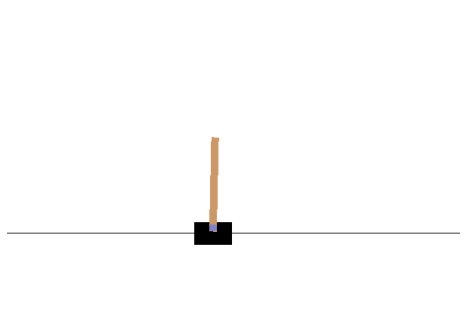

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gym

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
%matplotlib inline
from IPython.display import display

ENV = 'CartPole-v0' # env name
NUM_DIZITIZED = 6 # dizitize split num
GAMMA = 0.09 # time discount rate
ETA = 0.5 # 学習係数
MAX_STEPS = 200 # 1試行のstep数
NUM_EPISODES = 1000 # 最大試行回数

class Agent():
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)

    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)

    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

class Brain():
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIZITIZED**num_states, num_actions))

    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num+1)[1:-1]

    def digitize(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation

        # >>> np.digitize(300, bins=[10,22,310,400]) : 2
        # >>> np.digitize(399, bins=[10,22,310,400]) : 3
        # >>> np.digitize(400~, bins=[10,22,310,400]) : 4

        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITIZED)),
            np.digitize(pole_v, bins=self.bins(-2.4, 2.4, NUM_DIZITIZED))]

        return sum([x*(NUM_DIZITIZED**i) for i,x in enumerate(digitized)])

    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize(observation)
        state_next = self.digitize(observation_next)
        max_q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] += ETA * (reward + GAMMA * max_q_next - self.q_table[state, action])

    def decide_action(self, observation, episode):
        ## ε-greedy 徐々に最適行動のみを採用するように
        state = self.digitize(observation)
        epsilon = 0.5 * (1 / (episode + 1))

        if epsilon <= np.random.uniform(0,1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
        return action

class Environment():
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0]
        num_actions = self.env.action_space.n

        self.agent = Agent(num_states, num_actions)

    def run(self):
        complete_episodes = 0
        is_episode_final = False
        frames = []

        for episode in range(NUM_EPISODES):
            observation = self.env.reset()
            for step in range(MAX_STEPS):
                if is_episode_final:
                    frames.append(self.env.render(mode='rgb_array'))

                action = self.agent.get_action(observation, episode)
                observation_next, _, done, _ = self.env.step(action)

                if done:
                    if step < 195:
                        reward = -1
                        complete_episodes = 0 # 連続記録が途絶える
                    else:
                        reward = 1
                        complete_episodes += 1 # 連続記録を更新
                else:
                    reward = 0

                self.agent.update_Q_function(observation, action, reward, observation_next)
                observation = observation_next

                if done:
                    print(f"{episode} Episode: Finished after {step+1}")
                    break
            if is_episode_final:
                display_frames_as_gif(frames)
                break

            if complete_episodes >= 10:
                print("10回連続成功")
                is_episode_final = True


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
 
    def animate(i):
        patch.set_data(frames[i])
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)
 
    anim.save('movie_cartpole.gif', writer="imagemagick")

def main():
#     # CartPoleをランダムに動かす
#     frames = []
#     env = gym.make('CartPole-v0')
#     env.reset()
#     for step in range(0, 200):
#         frames.append(env.render(mode='rgb_array'))  # framesに各時刻の画像を追加していく
#         action = np.random.choice(2)  # 0(カートを左に押す),1(カートを右に押す)をランダムに返す
#         observation, reward, done, info = env.step(action)  # actionを実行する

#     display_frames_as_gif(frames)

    cartpole_env = Environment()
    cartpole_env.run()


if __name__ == "__main__":
    main()